# Data Loading

In [2]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error as mse
from tensorflow.keras.models import load_model

In [3]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

df = pd.read_csv(csv_path)
df


13582336/13568290 [==============================] - 0s 0us/step


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [4]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 00:10:00,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 01:10:00,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
2009-01-01 01:20:00,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
2009-01-01 01:30:00,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5


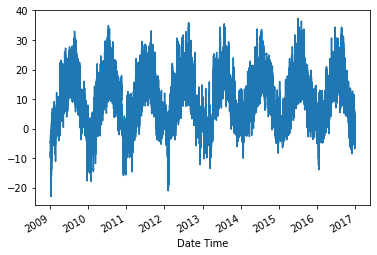

In [5]:
temp = df['T (degC)']
temp.plot()

# Common functions

In [15]:
def df_to_X_y(df, window_size):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

def plot_model_predictions(fpath, X_train1, y_train1, X_val1, y_val1, X_test1, y_test1):
  model1 = load_model(fpath)

  train_predictions = model1.predict(X_train1).flatten()
  train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
  print(train_results)

  val_predictions = model1.predict(X_val1).flatten()
  val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
  print(val_results)

  test_predictions = model1.predict(X_test1).flatten()
  test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
  print(test_results)

  fig, ax = plt.subplots(1, 3, figsize=(16, 5), sharey=True)
  ax[0].set_xlim([1, 60000])
  ax[0].plot(train_results['Train Predictions'][:], color='blue')
  ax[0].plot(train_results['Actuals'][:], color='green')
  
  #ax[1].set_xlim([60001,64999])
  ax[1].plot(val_results['Val Predictions'][:], color='blue')
  ax[1].plot(val_results['Actuals'][:], color='green')

  ax[2].set_xlim([65000, 65000 + len(test_results) - 1])
  ax[2].plot(test_results['Test Predictions'][:],color ='blue')
  ax[2].plot(test_results['Actuals'][:], color='green')
  #ax[2].plt.xlim([65000, 65000 + len(test_results) - 1])

def plot_predictions(model, X, y, start, end):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)  

def preprocess(X, train_mean, train_std):
  X[:, :, 0] = (X[:, :, 0] - train_mean) / train_std
  return X


# Model 1 : LSTM

# Input Layer:  
The input layer of a neural network is composed of artificial input neurons, and brings the initial data into the system for further processing by subsequent layers of artificial neurons.

# LSTM Layer
An LSTM layer learns long-term dependencies between time steps in time series and sequence data.The layer performs additive interactions, which can help improve gradient flow over long sequences during training.

# Dense Layer
Dense Layer is simple layer of neurons in which each neuron receives input from all the neurons of previous layer, thus called as dense. 

# LSTM gates: Forget, Input, Output gates
LSTM has logic gates (input, output and forget gates) which give inherent ability for it to retain information that is more relevant and forgo unnecessary information. This makes LSTM a good model for interpreting patterns over long periods. The important thing to note about LSTM is the input, which needs to be in the form of a 3D vector (samples, time-steps, features). Hence, the input has to be reshaped to fit this.





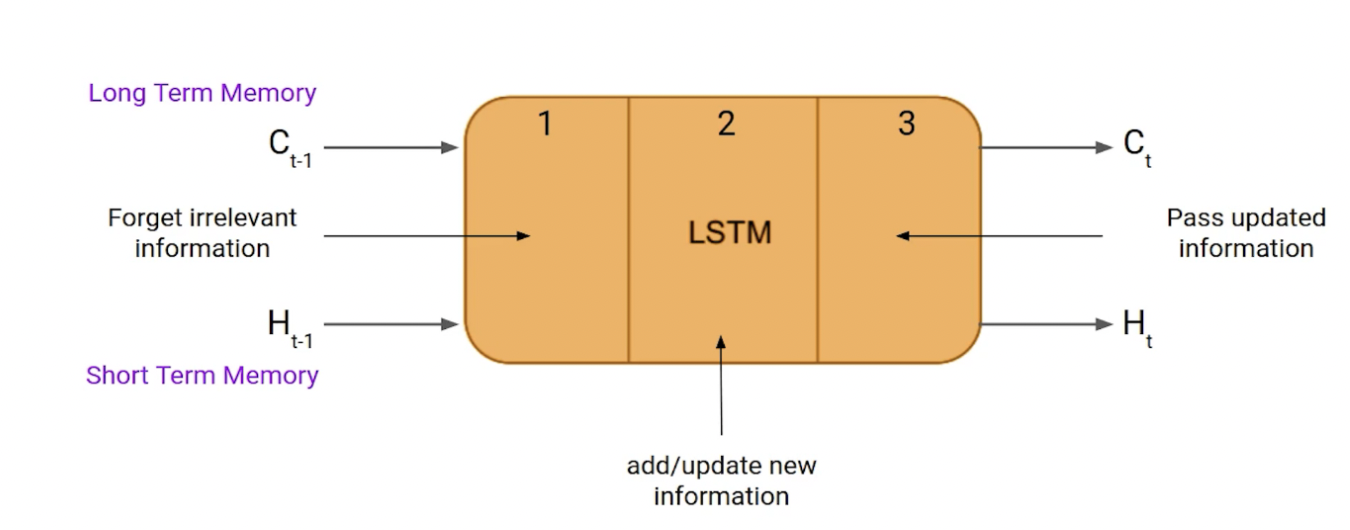

In [7]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
print("Before Split", X1.shape, y1.shape)  

X_train1, y_train1 = X1[:60000], y1[:60000]
X_val1, y_val1 = X1[60000:65000], y1[60000:65000]
X_test1, y_test1 = X1[65000:], y1[65000:]
print("Train after split", X_train1.shape, y_train1.shape)
print("Validation after split", X_val1.shape, y_val1.shape)
print("Test after split ", X_test1.shape, y_test1.shape)

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))
model1.summary()

cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Before Split (420546, 5, 1) (420546,)
Train after split (60000, 5, 1) (60000,)
Validation after split (5000, 5, 1) (5000,)
Test after split  (355546, 5, 1) (355546,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1862/1875 [============================>.] - ETA: 0s - loss: 30.2925 - root_mean_squared_error: 5.5039

1875/1875 [==============================] - 13s 6ms/step - loss: 30.0983 - root_mean_squared_error: 5.4862 - val_loss: 0.1775 - val_root_mean_squared_error: 0.4213
Epoch 2/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.7961 - root_mean_squared_error: 0.8923

1875/1875 [==============================] - 10s 5ms/step - loss: 0.7964 - root_mean_squared_error: 0.8924 - val_loss: 0.1028 - val_root_mean_squared_error: 0.3207
Epoch 3/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.1756 - root_mean_squared_error: 0.4191

1875/1875 [==============================] - 10s 6ms/step - loss: 0.1755 - root_mean_squared_error: 0.4189 - val_loss: 0.0727 - val_root_mean_squared_error: 0.2696
Epoch 4/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0855 - root_mean_squared_error: 0.2923

1875/1875 [==============================] - 10s 5ms/step - loss: 0.0854 - root_mean_squared_error: 0.2922 - val_loss: 0.0607 - val_root_mean_squared_error: 0.2464
Epoch 5/10
1861/1875 [============================>.] - ETA: 0s - loss: 0.0610 - root_mean_squared_error: 0.2470

1875/1875 [==============================] - 10s 5ms/step - loss: 0.0611 - root_mean_squared_error: 0.2471 - val_loss: 0.0574 - val_root_mean_squared_error: 0.2395
Epoch 6/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0527 - root_mean_squared_error: 0.2295

1875/1875 [==============================] - 11s 6ms/step - loss: 0.0526 - root_mean_squared_error: 0.2294 - val_loss: 0.0504 - val_root_mean_squared_error: 0.2245
Epoch 7/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0480 - root_mean_squared_error: 0.2191

1875/1875 [==============================] - 18s 10ms/step - loss: 0.0480 - root_mean_squared_error: 0.2191 - val_loss: 0.0473 - val_root_mean_squared_error: 0.2176
Epoch 8/10
1862/1875 [============================>.] - ETA: 0s - loss: 0.0455 - root_mean_squared_error: 0.2133

1875/1875 [==============================] - 11s 6ms/step - loss: 0.0457 - root_mean_squared_error: 0.2137 - val_loss: 0.0463 - val_root_mean_squared_error: 0.2151
Epoch 9/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.0442 - root_mean_squared_error: 0.2102

1875/1875 [==============================] - 10s 6ms/step - loss: 0.0442 - root_mean_squared_error: 0.2103 - val_loss: 0.0442 - val_root_mean_squared_error: 0.2103
Epoch 10/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.0433 - root_mean_squared_error: 0.2080

1875/1875 [==============================] - 12s 6ms/step - loss: 0.0433 - root_mean_squared_error: 0.2081 - val_loss: 0.0437 - val_root_mean_squared_error: 0.2090


       Train Predictions  Actuals
0              -8.289543    -8.05
1              -7.998716    -7.62
2              -7.467420    -7.62
3              -7.626894    -7.91
4              -8.063444    -8.43
...                  ...      ...
59995           1.783482     1.82
59996           1.800222     1.88
59997           1.890221     1.74
59998           1.691945     1.64
59999           1.585697     1.60

[60000 rows x 2 columns]
      Val Predictions  Actuals
0            1.555230     1.57
1            1.533723     1.49
2            1.443608     1.38
3            1.316362     1.26
4            1.182148     1.20
...               ...      ...
4995         8.542292     8.78
4996         8.985489     8.91
4997         8.964102     8.98
4998         9.035843     9.19
4999         9.330306     8.99

[5000 rows x 2 columns]
        Test Predictions  Actuals
0               8.809940     9.07
1               9.152087     9.11
2               9.075948     8.88
3               8.676894     8.76

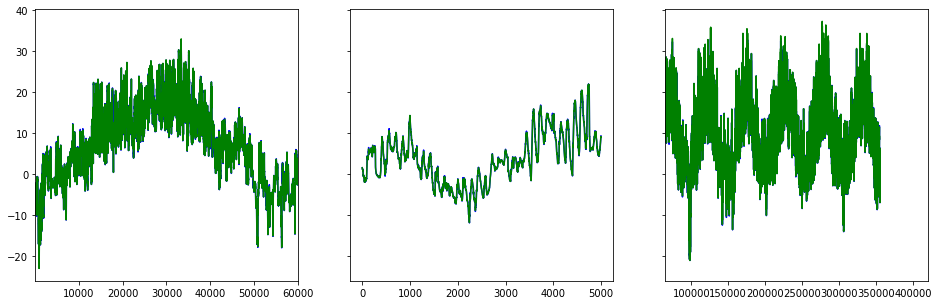

In [16]:
plot_model_predictions('model1/', X_train1, y_train1, X_val1, y_val1, X_test1, y_test1)

# Model2 : conv1D and Flatten

# Conv1D 
This layer creates a convolution kernel that is convolved with the layer input over a single spatial (or temporal) dimension to produce a tensor of outputs

# Flatten
Flatten layer is used to make the multidimensional input one-dimensional, commonly used in the transition from the convolution layer to the full connected layer. If flatten is applied to layer having input shape as (batch_size, 2,2),then the output shape of the layer will be (batch_size, 4). Note: Batch size remains the same.

In [17]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))
model2.summary()

cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4820 - root_mean_squared_error: 0.6943 - val_loss: 0.2243 - val_root_mean_squared_error: 0.4737
Epoch 2/10

This model has less number of training parameters and it relatively took less time to train the model

       Train Predictions  Actuals
0              -8.320549    -8.05
1              -8.005922    -7.62
2              -7.489267    -7.62
3              -7.597498    -7.91
4              -7.961741    -8.43
...                  ...      ...
59995           1.780681     1.82
59996           1.845251     1.88
59997           1.907955     1.74
59998           1.677502     1.64
59999           1.618382     1.60

[60000 rows x 2 columns]
      Val Predictions  Actuals
0            1.591784     1.57
1            1.547299     1.49
2            1.457418     1.38
3            1.342630     1.26
4            1.214743     1.20
...               ...      ...
4995         8.586942     8.78
4996         8.982650     8.91
4997         9.040719     8.98
4998         9.090798     9.19
4999         9.353566     8.99

[5000 rows x 2 columns]
        Test Predictions  Actuals
0               8.964002     9.07
1               9.158246     9.11
2               9.162479     8.88
3               8.804633     8.76

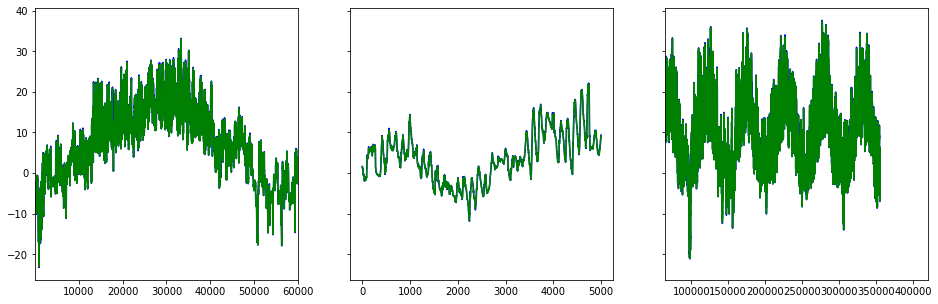

In [18]:
plot_model_predictions('model2/',  X_train1, y_train1, X_val1, y_val1, X_test1, y_test1)

# Model3 : GRU


In [19]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1868/1875 [============================>.] - ETA: 0s - loss: 22.8356 - root_mean_squared_error: 4.7787

1875/1875 [==============================] - 14s 6ms/step - loss: 22.7535 - root_mean_squared_error: 4.7701 - val_loss: 0.1734 - val_root_mean_squared_error: 0.4164
Epoch 2/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.4784 - root_mean_squared_error: 0.6917

1875/1875 [==============================] - 9s 5ms/step - loss: 0.4774 - root_mean_squared_error: 0.6910 - val_loss: 0.0833 - val_root_mean_squared_error: 0.2887
Epoch 3/10
1862/1875 [============================>.] - ETA: 0s - loss: 0.1210 - root_mean_squared_error: 0.3478

1875/1875 [==============================] - 9s 5ms/step - loss: 0.1211 - root_mean_squared_error: 0.3479 - val_loss: 0.0665 - val_root_mean_squared_error: 0.2578
Epoch 4/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0700 - root_mean_squared_error: 0.2645

1875/1875 [==============================] - 14s 8ms/step - loss: 0.0699 - root_mean_squared_error: 0.2643 - val_loss: 0.0585 - val_root_mean_squared_error: 0.2419
Epoch 5/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.0558 - root_mean_squared_error: 0.2361

1875/1875 [==============================] - 10s 5ms/step - loss: 0.0557 - root_mean_squared_error: 0.2359 - val_loss: 0.0551 - val_root_mean_squared_error: 0.2348
Epoch 6/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0498 - root_mean_squared_error: 0.2232

1875/1875 [==============================] - 11s 6ms/step - loss: 0.0499 - root_mean_squared_error: 0.2234 - val_loss: 0.0509 - val_root_mean_squared_error: 0.2255
Epoch 7/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.0473 - root_mean_squared_error: 0.2174

1875/1875 [==============================] - 9s 5ms/step - loss: 0.0472 - root_mean_squared_error: 0.2173 - val_loss: 0.0481 - val_root_mean_squared_error: 0.2194
Epoch 8/10
1859/1875 [============================>.] - ETA: 0s - loss: 0.0455 - root_mean_squared_error: 0.2133

1875/1875 [==============================] - 9s 5ms/step - loss: 0.0454 - root_mean_squared_error: 0.2132 - val_loss: 0.0458 - val_root_mean_squared_error: 0.2140
Epoch 9/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.0439 - root_mean_squared_error: 0.2096

1875/1875 [==============================] - 10s 5ms/step - loss: 0.0439 - root_mean_squared_error: 0.2096 - val_loss: 0.0450 - val_root_mean_squared_error: 0.2121
Epoch 10/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.0430 - root_mean_squared_error: 0.2075

1875/1875 [==============================] - 9s 5ms/step - loss: 0.0431 - root_mean_squared_error: 0.2075 - val_loss: 0.0439 - val_root_mean_squared_error: 0.2096


       Train Predictions  Actuals
0              -8.213397    -8.05
1              -7.886763    -7.62
2              -7.378020    -7.62
3              -7.563160    -7.91
4              -7.952508    -8.43
...                  ...      ...
59995           1.757984     1.82
59996           1.806698     1.88
59997           1.919478     1.74
59998           1.691924     1.64
59999           1.587365     1.60

[60000 rows x 2 columns]
      Val Predictions  Actuals
0            1.578764     1.57
1            1.561758     1.49
2            1.458520     1.38
3            1.327729     1.26
4            1.207214     1.20
...               ...      ...
4995         8.559873     8.78
4996         8.990711     8.91
4997         8.987827     8.98
4998         9.049259     9.19
4999         9.328734     8.99

[5000 rows x 2 columns]
        Test Predictions  Actuals
0               8.860030     9.07
1               9.150524     9.11
2               9.099166     8.88
3               8.728646     8.76

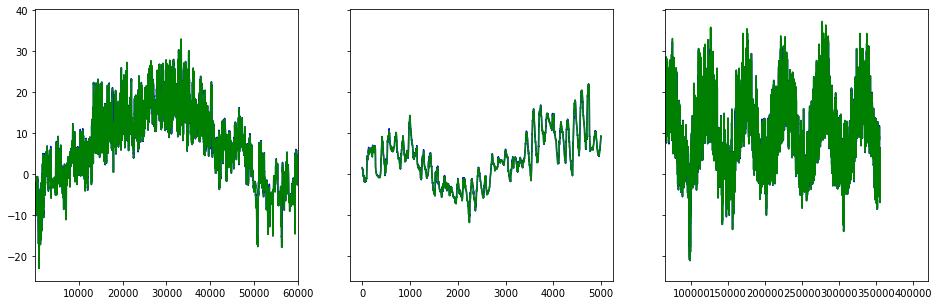

In [20]:
plot_model_predictions('model3/',  X_train1, y_train1, X_val1, y_val1, X_test1, y_test1)

# Model 4 : LSTM

In [21]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 00:10:00,-8.02,0.043619,0.999048,0.009452,0.999955
2009-01-01 00:20:00,-8.41,0.087156,0.996195,0.009571,0.999954
2009-01-01 00:30:00,-8.51,0.130526,0.991445,0.009691,0.999953
2009-01-01 00:40:00,-8.31,0.173648,0.984808,0.009810,0.999952
2009-01-01 00:50:00,-8.27,0.216440,0.976296,0.009930,0.999951


In [22]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

X2, y2 = df_to_X_y2(temp_df, 6)
print("Before split ", X2.shape, y2.shape)

X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]
print("Train after split ", X2_train.shape, y2_train.shape)
print("Validation after split ", X2_val.shape, y2_val.shape)
print("Test after split ", X2_test.shape, y2_test.shape)

temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])

preprocess(X2_train, temp_training_mean, temp_training_std )
preprocess(X2_val, temp_training_mean, temp_training_std )
preprocess(X2_test, temp_training_mean, temp_training_std )  

Before split  (420545, 6, 5) (420545,)
Train after split  (60000, 6, 5) (60000,)
Validation after split  (5000, 6, 5) (5000,)
Test after split  (355545, 6, 5) (355545,)


array([[[ 0.17126232,  0.53729961, -0.84339145,  0.99686941,
          0.07906569],
        [ 0.18550315,  0.5       , -0.8660254 ,  0.99687885,
          0.0789466 ],
        [ 0.19317128,  0.46174861, -0.88701083,  0.99688827,
          0.07882751],
        [ 0.2161757 ,  0.42261826, -0.90630779,  0.99689768,
          0.07870842],
        [ 0.19426673,  0.38268343, -0.92387953,  0.99690708,
          0.07858933],
        [ 0.20303032,  0.34202014, -0.93969262,  0.99691646,
          0.07847023]],

       [[ 0.18550315,  0.5       , -0.8660254 ,  0.99687885,
          0.0789466 ],
        [ 0.19317128,  0.46174861, -0.88701083,  0.99688827,
          0.07882751],
        [ 0.2161757 ,  0.42261826, -0.90630779,  0.99689768,
          0.07870842],
        [ 0.19426673,  0.38268343, -0.92387953,  0.99690708,
          0.07858933],
        [ 0.20303032,  0.34202014, -0.93969262,  0.99691646,
          0.07847023],
        [ 0.20741211,  0.3007058 , -0.95371695,  0.99692582,
          0.0

In [23]:
# Before Split (420546, 5, 1) (420546,)
# Train after split (60000, 5, 1) (60000,)
# Validation after split (5000, 5, 1) (5000,)
# Test after split  (355546, 5, 1) (355546,)

model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17920     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1868/1875 [============================>.] - ETA: 0s - loss: 27.3369 - root_mean_squared_error: 5.2285

1875/1875 [==============================] - 14s 7ms/step - loss: 27.2649 - root_mean_squared_error: 5.2216 - val_loss: 5.2100 - val_root_mean_squared_error: 2.2825
Epoch 2/10
1870/1875 [============================>.] - ETA: 0s - loss: 9.5680 - root_mean_squared_error: 3.0932

1875/1875 [==============================] - 11s 6ms/step - loss: 9.5640 - root_mean_squared_error: 3.0926 - val_loss: 4.8005 - val_root_mean_squared_error: 2.1910
Epoch 3/10
1872/1875 [============================>.] - ETA: 0s - loss: 9.0427 - root_mean_squared_error: 3.0071

1875/1875 [==============================] - 11s 6ms/step - loss: 9.0508 - root_mean_squared_error: 3.0085 - val_loss: 4.4354 - val_root_mean_squared_error: 2.1060
Epoch 4/10
1875/1875 [==============================] - ETA: 0s - loss: 8.6337 - root_mean_squared_error: 2.9383

1875/1875 [==============================] - 11s 6ms/step - loss: 8.6337 - root_mean_squared_error: 2.9383 - val_loss: 4.0991 - val_root_mean_squared_error: 2.0246
Epoch 5/10
1875/1875 [==============================] - ETA: 0s - loss: 8.2547 - root_mean_squared_error: 2.8731

1875/1875 [==============================] - 11s 6ms/step - loss: 8.2547 - root_mean_squared_error: 2.8731 - val_loss: 3.8059 - val_root_mean_squared_error: 1.9509
Epoch 6/10
1868/1875 [============================>.] - ETA: 0s - loss: 7.8932 - root_mean_squared_error: 2.8095

1875/1875 [==============================] - 12s 6ms/step - loss: 7.8975 - root_mean_squared_error: 2.8103 - val_loss: 3.5219 - val_root_mean_squared_error: 1.8767
Epoch 7/10
1862/1875 [============================>.] - ETA: 0s - loss: 7.5685 - root_mean_squared_error: 2.7511

1875/1875 [==============================] - 11s 6ms/step - loss: 7.5573 - root_mean_squared_error: 2.7490 - val_loss: 3.2404 - val_root_mean_squared_error: 1.8001
Epoch 8/10
1864/1875 [============================>.] - ETA: 0s - loss: 7.2244 - root_mean_squared_error: 2.6878

1875/1875 [==============================] - 11s 6ms/step - loss: 7.2322 - root_mean_squared_error: 2.6893 - val_loss: 2.9935 - val_root_mean_squared_error: 1.7302
Epoch 9/10
1866/1875 [============================>.] - ETA: 0s - loss: 6.9231 - root_mean_squared_error: 2.6312

1875/1875 [==============================] - 13s 7ms/step - loss: 6.9223 - root_mean_squared_error: 2.6310 - val_loss: 2.7534 - val_root_mean_squared_error: 1.6593
Epoch 10/10
1869/1875 [============================>.] - ETA: 0s - loss: 6.6226 - root_mean_squared_error: 2.5734

1875/1875 [==============================] - 11s 6ms/step - loss: 6.6295 - root_mean_squared_error: 2.5748 - val_loss: 2.5388 - val_root_mean_squared_error: 1.5934


       Train Predictions  Actuals
0              -1.469088    -7.62
1              -1.469088    -7.62
2              -1.469088    -7.91
3              -1.469088    -8.43
4              -1.469088    -8.76
...                  ...      ...
59995           1.692742     1.88
59996           1.672470     1.74
59997           1.621445     1.64
59998           1.550373     1.60
59999           1.479806     1.57

[60000 rows x 2 columns]
      Val Predictions  Actuals
0            1.419301     1.49
1            1.352291     1.38
2            1.273208     1.26
3            1.186634     1.20
4            1.102838     1.22
...               ...      ...
4995         8.845585     8.91
4996         9.072659     8.98
4997         9.224831     9.19
4998         9.357029     8.99
4999         9.344851     9.07

[5000 rows x 2 columns]
        Test Predictions  Actuals
0               9.302403     9.11
1               9.287321     8.88
2               9.182708     8.76
3               9.033544     8.92

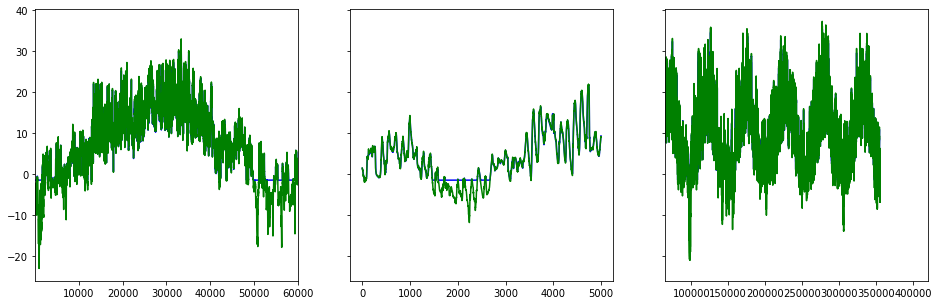

In [24]:
plot_model_predictions('model4/', X2_train, y2_train, X2_val, y2_val, X2_test, y2_test)

# Model 5 : LSTM

In [25]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)
p_temp_df.head()

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 00:10:00,996.52,-8.02,0.043619,0.999048,0.009452,0.999955
2009-01-01 00:20:00,996.57,-8.41,0.087156,0.996195,0.009571,0.999954
2009-01-01 00:30:00,996.53,-8.51,0.130526,0.991445,0.009691,0.999953
2009-01-01 00:40:00,996.51,-8.31,0.173648,0.984808,0.009810,0.999952
2009-01-01 00:50:00,996.51,-8.27,0.216440,0.976296,0.009930,0.999951


In [26]:
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

X3, y3 = df_to_X_y3(p_temp_df, 7)
print("Before split: ", X3.shape, y3.shape)

X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X, train_mean, train_std, temp_mean, temp_std):
  X[:, :, 0] = (X[:, :, 0] - train_mean) / train_std
  X[:, :, 1] = (X[:, :, 1] - temp_mean) / temp_std

def preprocess_output3(y, train_mean, train_std, temp_mean, temp_std):
  y[:, 0] = (y[:, 0] - train_mean) / train_std
  y[:, 1] = (y[:, 1] - temp_mean) / temp_std
  return y

preprocess3(X3_train, p_training_mean3, p_training_std3, temp_training_mean3, temp_training_std3)
preprocess3(X3_val,  p_training_mean3, p_training_std3, temp_training_mean3, temp_training_std3)
preprocess3(X3_test,  p_training_mean3, p_training_std3, temp_training_mean3, temp_training_std3)  

preprocess_output3(y3_train, p_training_mean3, p_training_std3, temp_training_mean3, temp_training_std3)
preprocess_output3(y3_val, p_training_mean3, p_training_std3, temp_training_mean3, temp_training_std3)
preprocess_output3(y3_test, p_training_mean3, p_training_std3, temp_training_mean3, temp_training_std3)

Before split:  (420544, 7, 6) (420544, 2)


array([[-0.47792409,  0.18220966],
       [-0.47239294,  0.16906414],
       [-0.4746054 ,  0.1865915 ],
       ...,
       [ 1.35178046, -1.13672383],
       [ 1.35067423, -1.25393801],
       [ 1.35178046, -1.31857014]])

In [27]:
model5 = Sequential()
model5.add(InputLayer((7, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))
model5.summary()

cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                18176     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 2)                 18        
                                                                 
Total params: 18,714
Trainable params: 18,714
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.1157 - root_mean_squared_error: 0.3401

1875/1875 [==============================] - 13s 6ms/step - loss: 0.1152 - root_mean_squared_error: 0.3394 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0723
Epoch 2/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.0584

1875/1875 [==============================] - 14s 7ms/step - loss: 0.0034 - root_mean_squared_error: 0.0583 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0601
Epoch 3/10
1863/1875 [============================>.] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0477

1875/1875 [==============================] - 12s 6ms/step - loss: 0.0023 - root_mean_squared_error: 0.0477 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0520
Epoch 4/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0421

1875/1875 [==============================] - 11s 6ms/step - loss: 0.0018 - root_mean_squared_error: 0.0421 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0471
Epoch 5/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0014 - root_mean_squared_error: 0.0376

1875/1875 [==============================] - 12s 6ms/step - loss: 0.0014 - root_mean_squared_error: 0.0376 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0412
Epoch 6/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0339

1875/1875 [==============================] - 12s 6ms/step - loss: 0.0012 - root_mean_squared_error: 0.0339 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0385
Epoch 7/10
1869/1875 [============================>.] - ETA: 0s - loss: 9.5142e-04 - root_mean_squared_error: 0.0308

1875/1875 [==============================] - 12s 6ms/step - loss: 9.5098e-04 - root_mean_squared_error: 0.0308 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0338
Epoch 8/10
1869/1875 [============================>.] - ETA: 0s - loss: 7.9968e-04 - root_mean_squared_error: 0.0283

1875/1875 [==============================] - 11s 6ms/step - loss: 7.9977e-04 - root_mean_squared_error: 0.0283 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0319
Epoch 9/10
1863/1875 [============================>.] - ETA: 0s - loss: 6.9210e-04 - root_mean_squared_error: 0.0263

1875/1875 [==============================] - 13s 7ms/step - loss: 6.9104e-04 - root_mean_squared_error: 0.0263 - val_loss: 7.8420e-04 - val_root_mean_squared_error: 0.0280
Epoch 10/10
1865/1875 [============================>.] - ETA: 0s - loss: 6.0548e-04 - root_mean_squared_error: 0.0246

1875/1875 [==============================] - 12s 6ms/step - loss: 6.0549e-04 - root_mean_squared_error: 0.0246 - val_loss: 6.8247e-04 - val_root_mean_squared_error: 0.0261


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.224785,0.182210,-0.503234,-0.477924
1,0.204999,0.169064,-0.492217,-0.472393
2,0.186826,0.186591,-0.484579,-0.474605
3,0.193305,0.247937,-0.485245,-0.476818
4,0.243610,0.308188,-0.492192,-0.484561
...,...,...,...,...
95,-0.040182,-0.056601,-0.717536,-0.724613
96,-0.055058,-0.059887,-0.723438,-0.741207
97,-0.063606,-0.066460,-0.735598,-0.748950
98,-0.070735,-0.076319,-0.746324,-0.767756


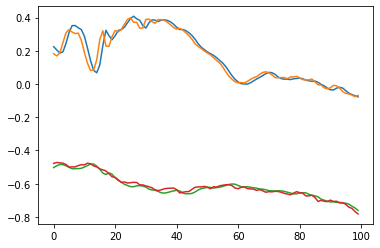

In [28]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

plot_predictions2(model5, X3_test, y3_test)

# Model 6 : LSTM

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,9.268654,8.88,983.051208,983.28
1,9.088030,8.76,983.150757,983.33
2,8.922138,8.92,983.219849,983.31
3,8.981289,9.48,983.213806,983.29
4,9.440501,10.03,983.151001,983.22
...,...,...,...,...
95,6.849880,6.70,981.113953,981.05
96,6.714082,6.67,981.060608,980.90
97,6.636046,6.61,980.950684,980.83
98,6.570973,6.52,980.853699,980.66


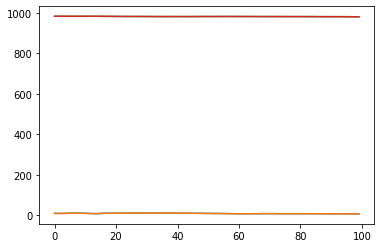

In [29]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
  p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

post_processed_df = plot_predictions2(model5, X3_test, y3_test)
post_processed_df   

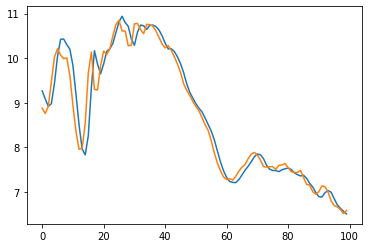

In [30]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])

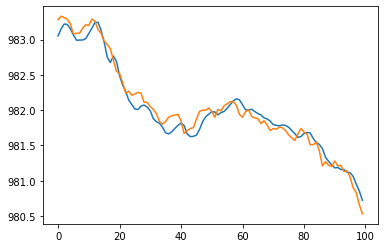

In [31]:
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])

In [32]:
model6 = Sequential()
model6.add(InputLayer((7, 6)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))

model6.summary()

cp6 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model6.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp6])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 7, 32)             4992      
                                                                 
 lstm_4 (LSTM)               (None, 64)                24832     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 30,362
Trainable params: 30,362
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0936 - root_mean_squared_error: 0.3059

1875/1875 [==============================] - 26s 12ms/step - loss: 0.0935 - root_mean_squared_error: 0.3058 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0695
Epoch 2/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.0619

1875/1875 [==============================] - 19s 10ms/step - loss: 0.0038 - root_mean_squared_error: 0.0618 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0658
Epoch 3/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0562

1875/1875 [==============================] - 20s 11ms/step - loss: 0.0032 - root_mean_squared_error: 0.0562 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0597
Epoch 4/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0530

1875/1875 [==============================] - 19s 10ms/step - loss: 0.0028 - root_mean_squared_error: 0.0530 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0580
Epoch 5/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0503

1875/1875 [==============================] - 20s 11ms/step - loss: 0.0025 - root_mean_squared_error: 0.0503 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0564
Epoch 6/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0477

1875/1875 [==============================] - 20s 11ms/step - loss: 0.0023 - root_mean_squared_error: 0.0477 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0523
Epoch 7/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0448

1875/1875 [==============================] - 21s 11ms/step - loss: 0.0020 - root_mean_squared_error: 0.0448 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0486
Epoch 8/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0415

1875/1875 [==============================] - 19s 10ms/step - loss: 0.0017 - root_mean_squared_error: 0.0415 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0455
Epoch 9/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0015 - root_mean_squared_error: 0.0381

1875/1875 [==============================] - 20s 11ms/step - loss: 0.0015 - root_mean_squared_error: 0.0381 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0407
Epoch 10/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0353

1875/1875 [==============================] - 19s 10ms/step - loss: 0.0012 - root_mean_squared_error: 0.0353 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0377


Thus tried to fit the climate data using multiple models.

Summary :
1. Model 1: LSTM, Dense
   root_mean_squared_error: 0.2126 , param count: 17425
2. Model 2: Conv1D and Flatten 
   root_mean_squared_error: 0.2093 , param count:  2257
3. Model 3: LST, Dense
   root_mean_squared_error: 0.2075 , param count: 13393
4. Model 4: Conv1D and Flatten 
   root_mean_squared_error: 2.5748 , param count:  18449
5. Model 5: LST, Dense
   root_mean_squared_error: 0.0246 , param count: 18714
6. Model 6: LST, Dense
   root_mean_squared_error: 0.0353 , param count: 30,362  

Models 2 and 5 seems to give better results with better mean squared errors values. However this can be further improved by trying regularization and tuning the batch size and hyperparameters like epochs and learning rate.    